# NAME:AMANDEEP SINGH

## THE SPARKS FOUNDATION

### TASK 1: PREDICITON USING SUPERVISIED ML


## Simple Linear Regression
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables

#### 1. Importing the required libraries

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression


#### 2. Reading the data

In [2]:
data="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df=pd.read_csv(data)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


#### 3. Exploring the data

In [3]:
df.shape      # NO OF ROWS AND COLUMNS

(25, 2)

In [4]:
df.info()    # GIVES MORE INFORMATION THAN shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.head()     # GIVES TOP 5 VALUE BY DEFAULT

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
df.columns    # NAME OF ALL COLUMNS

Index(['Hours', 'Scores'], dtype='object')

In [7]:
df.describe()  # CALCULATE STATISTICAL DATA LIKE mean,min etc....

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
df.isnull==True       # TO CHECK FOR NULL VALUES

False

In [9]:
df.sort_values(by="Scores",ascending=False)    # SORT DATE IN DESCENDING ORDER

,Hours,Scores
15,8.9,95
6,9.2,88
24,7.8,86
10,7.7,85
8,8.3,81
23,6.9,76
3,8.5,75
19,7.4,69
18,6.1,67
11,5.9,62


#### 4.Visulation of Data

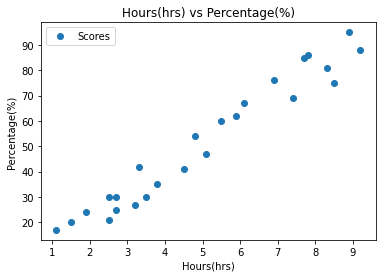

In [10]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours(hrs) vs Percentage(%)')  
plt.xlabel('Hours(hrs)')  
plt.ylabel('Percentage(%)')  
plt.show()

##### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

<AxesSubplot:>

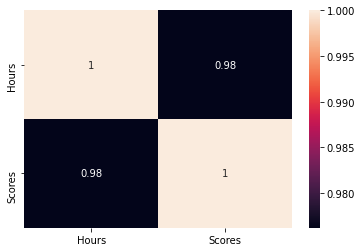

In [11]:
c=df.corr()
sns.heatmap(c,annot=True)

### 5.Training the Model

#### a.Preparing and Splitting the dataset

In [12]:
X = df.iloc[:, :-1].values  
Y = df.iloc[:, 1].values 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### b.Fitting the Data into the model

In [13]:
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

print("Model training completed.")

Model training completed.


#### c.Visualizing model

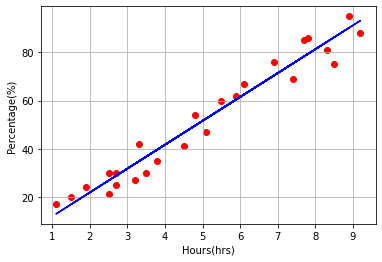

In [14]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, Y,color='red')
plt.plot(X, line,color='Blue')
plt.xlabel('Hours(hrs)')  
plt.ylabel('Percentage(%)')  
plt.grid()
plt.show()

###  6.Making Predictions
Now that we have trained our model,so make some predictions.

In [15]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
# Comparing Actual vs Predicted
compare_val = pd.DataFrame({'Actual Marks': Y_test, 'Predicted Marks': y_pred})  
compare_val

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### Q.What will be the score if a student studies for 9.25 hours daily ?

In [17]:
hr = 9.25
sr = regressor.predict([[hr]])
print('We  can see that if student studies for {} hours per day, then he/she will score {} percentage in his exam.'.format(hr,sr))

We  can see that if student studies for 9.25 hours per day, then he/she will score [93.69173249] percentage in his exam.


### Evaluating the Model

In [18]:
# Calculating the accuracy of the model
from sklearn import metrics
print('Mean Absolute Error :',metrics.mean_absolute_error(Y_test, y_pred))
print('Mean Square Error :',metrics.mean_squared_error(Y_test, y_pred))
print('Root Mean Square Error :',math.sqrt(metrics.mean_squared_error(Y_test, y_pred)))

Mean Absolute Error : 4.183859899002975
Mean Square Error : 21.598769307217406
Root Mean Square Error : 4.647447612100367
